# Simple Linear Regression

1. Read the dataset
2. EDA , FE 
3. Divide oue dataset into independent and dependent features
4. Further decide the dataset into train and test
5. Standard Scaling on the train and test data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [50]:
df= pd.read_csv('height-weight.csv')

In [51]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Weight')

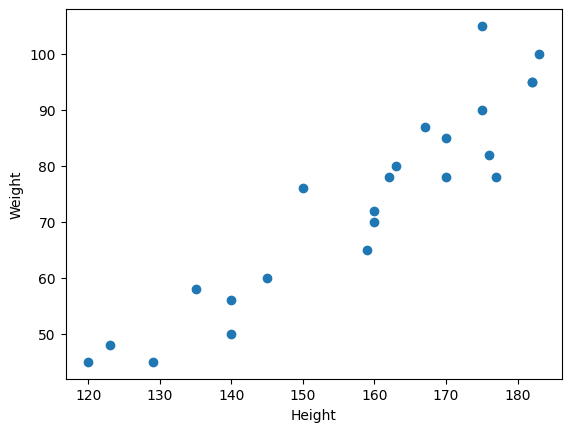

In [52]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [53]:
## divide our dataset into independent and dependent features
x= df[['Weight']]  ## independent feature 
y= df[['Height']]  ## dependent feature


In [54]:
x.shape,y.shape

((23, 1), (23, 1))

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train ,x_test,y_train,y_test =train_test_split(x,y,test_size=.2,random_state=42)

In [57]:
x_test.shape,x_train.shape

((5, 1), (18, 1))

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler =StandardScaler()

In [60]:
x_train=scaler.fit_transform(x_train)

In [61]:
x_test =scaler.transform(x_test)
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

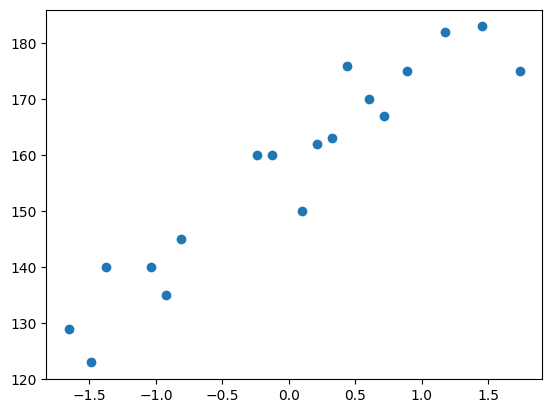

In [62]:
plt.scatter(x_train,y_train)

In [63]:
## agar suppose naya weight aata h tab phele usko transform karenge fir daalenge
scaler.transform([[80]])

c:\Users\Shreyansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [64]:
## MOdel Training 
from sklearn.linear_model import LinearRegression

In [65]:
regressor = LinearRegression()

In [66]:
## Training  the train data
regressor.fit(x_train,y_train)

LinearRegression()

In [67]:
regressor.intercept_

array([157.5])

In [68]:
regressor.coef_

array([[17.03440872]])

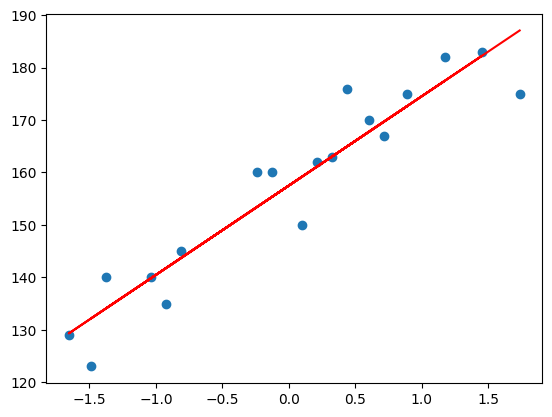

In [69]:
plt.scatter(x_train,y_train)
plt.plot(x_train ,regressor.predict(x_train),'r')

## prediction of train data 
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train =157.5 +17.03(x_train)

## prediction of test data 
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test =157.5 +17.03(x_test)

In [71]:
y_test_pred =regressor.predict(x_test)
y_test_pred

array([[161.08467086],
       [161.08467086],
       [129.3041561 ],
       [177.45645118],
       [148.56507414]])

In [72]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


## Performance Metrics MAE ,MSE, RMSE

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [77]:
mse =mean_squared_error(y_test,y_test_pred)
mae =mean_absolute_error(y_test,y_test_pred)
print(mse)
print(mae)

109.77592599051664
9.822657814519232


### Accuracy of the model R squared and adjustedd r squared 
##  R Square

Formula 

**R^2 = 1 - SSR/SST**

- R^2  = coefficient of determination
- SSR = sum of squares of residuals
- SST = total sum of squares


In [78]:
from sklearn.metrics import r2_score

In [80]:
score =r2_score(y_test,y_test_pred)
score

0.776986986042344

##  Adjusted R Square

Formula 

**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

- R^2  = coefficient of determination
- n = The number of observations
- k = The number of predictor variables

In [82]:
# display adjusted R -square 
adjusted_score = 1 - (1-score)*(len(y_test) -1)/(len(y_test) - x_test.shape[1]- 1)
adjusted_score

0.7026493147231252